# Aggregate data on social media removals
- Test using Twitter report (January - June 2019) and related info from Luminate

In [16]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [17]:
sns.set(style="whitegrid")

### Twitter transparency report (January - June 2019)

In [2]:
# load data
twitter = pd.read_csv('../data/twitter/removal-requests-report-jan-jun-2019.csv', decimal=',')
twitter.head()

,TIME PERIOD,COUNTRY,REMOVAL REQUESTS (COURT ORDERS),"REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)",PERCENTAGE WHERE SOME CONTENT WITHHELD,ACCOUNTS SPECIFIED,ACCOUNTS WITHHELD,TWEETS WITHHELD,ACCOUNTS (TOS)
0,January - June 2019,Afghanistan,-,-,-,-,-,-,-
1,January - June 2019,Albania,0,1,0%,1,0,0,1
2,January - June 2019,Argentina,0,1,0%,1,0,0,0
3,January - June 2019,Australia,1,4,0%,5,0,0,1
4,January - June 2019,Austria,0,3,0%,3,0,0,1


In [3]:
twitter.query('COUNTRY == "India"')

,TIME PERIOD,COUNTRY,REMOVAL REQUESTS (COURT ORDERS),"REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)",PERCENTAGE WHERE SOME CONTENT WITHHELD,ACCOUNTS SPECIFIED,ACCOUNTS WITHHELD,TWEETS WITHHELD,ACCOUNTS (TOS)
30,January - June 2019,India,8,496,6%,"2,484",73,241,578


In [4]:
# Changing data types

In [9]:
twitter['ACCOUNTS SPECIFIED'] = twitter['ACCOUNTS SPECIFIED'].str.replace(',', '')
twitter.query('COUNTRY == "India"')

,TIME PERIOD,COUNTRY,REMOVAL REQUESTS (COURT ORDERS),"REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)",PERCENTAGE WHERE SOME CONTENT WITHHELD,ACCOUNTS SPECIFIED,ACCOUNTS WITHHELD,TWEETS WITHHELD,ACCOUNTS (TOS)
30,January - June 2019,India,8,496,6%,2484,73,241,578


In [10]:
# Function to convert columns to int32
def data_types(dataframe, cols = [], to_type = ''):
    for col in cols:
        try:
            dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
            dataframe[col] = dataframe[col].astype(to_type)
        except ValueError as e:
            print(e)
            pass
    
    return dataframe.dtypes

In [11]:
cols = ['REMOVAL REQUESTS (COURT ORDERS)', 'REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)', 'ACCOUNTS SPECIFIED', 'ACCOUNTS WITHHELD', 'TWEETS WITHHELD']

In [12]:
data_types(twitter, cols, 'int32')

Cannot convert non-finite values (NA or inf) to integer
Cannot convert non-finite values (NA or inf) to integer
Cannot convert non-finite values (NA or inf) to integer
Cannot convert non-finite values (NA or inf) to integer
Cannot convert non-finite values (NA or inf) to integer


TIME PERIOD                                       object
COUNTRY                                           object
REMOVAL REQUESTS (COURT ORDERS)                  float64
REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)    float64
PERCENTAGE WHERE SOME CONTENT WITHHELD            object
ACCOUNTS SPECIFIED                               float64
ACCOUNTS WITHHELD                                float64
TWEETS WITHHELD                                  float64
ACCOUNTS (TOS)                                    object
dtype: object

In [22]:
len(twitter[twitter['REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)'] > 0])

44

In [83]:
r1 = twitter.sort_values(by='REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)', ascending=False).head(10)

In [84]:
r2 = twitter.sort_values(by='REMOVAL REQUESTS (COURT ORDERS)', ascending=False).head(10)

In [99]:
r3 = twitter.sort_values(by='ACCOUNTS WITHHELD', ascending=False).head(11)
r3 = r3.iloc[1:]

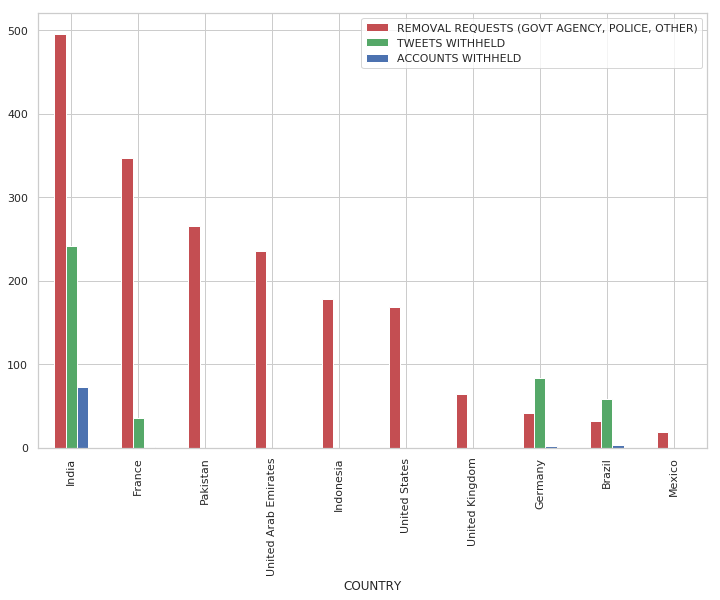

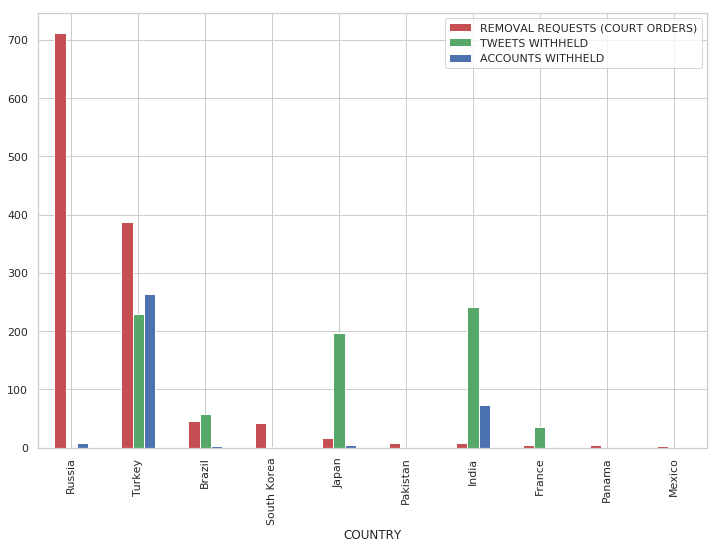

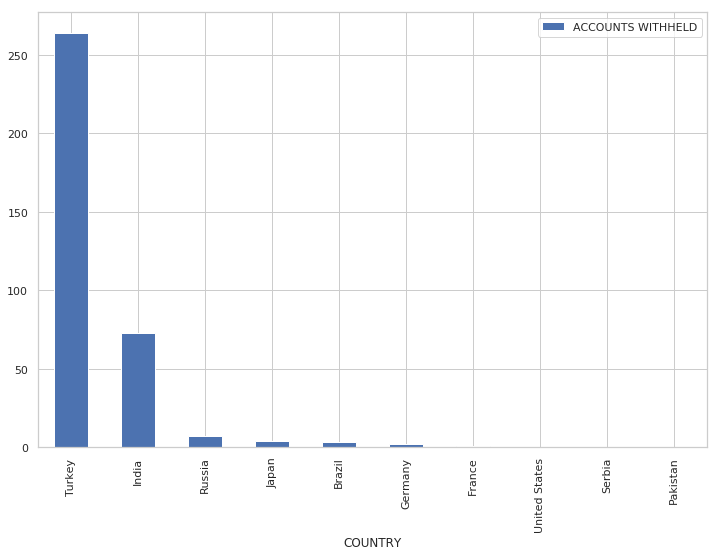

In [101]:
# Nested barplot
plt.rcParams['figure.figsize'] = (12, 8)

direct = ['REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)', 'TWEETS WITHHELD', 'ACCOUNTS WITHHELD']
court = ['REMOVAL REQUESTS (COURT ORDERS)', 'TWEETS WITHHELD', 'ACCOUNTS WITHHELD']
colors = ['r', 'g', 'b']

r1.plot(subplots=False, x="COUNTRY", y=direct, kind='bar', color=colors)
r2.plot(x="COUNTRY", y=court, kind='bar', color=colors)
r3.plot(x="COUNTRY", y=['ACCOUNTS WITHHELD'], kind='bar', color='b')

In [102]:
twitter.query('COUNTRY == "Russia"')

,TIME PERIOD,COUNTRY,REMOVAL REQUESTS (COURT ORDERS),"REMOVAL REQUESTS (GOVT AGENCY, POLICE, OTHER)",PERCENTAGE WHERE SOME CONTENT WITHHELD,ACCOUNTS SPECIFIED,ACCOUNTS WITHHELD,TWEETS WITHHELD,ACCOUNTS (TOS)
63,January - June 2019,Russia,711.0,NaN,34%,3809.0,7.0,NaN,905


## Dataset with all twitter transparency reports